# KFOLD CROSS VALİDATİON

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)

In [5]:
scores = []

In [6]:
for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    scores.append(accuracy)
    

In [7]:
mean_accuracy = np.mean(scores)

In [8]:
print("k-fold result:", scores)
print("mean accuracy:", mean_accuracy )

k-fold result: [1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]
mean accuracy: 0.9666666666666668


# Confusion Matrix

In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [10]:
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [11]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(x_test)

In [13]:
cm = confusion_matrix(y_test,y_pred)

In [14]:
labels = ["Setosa", "Versicolor", "Virginica"]
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

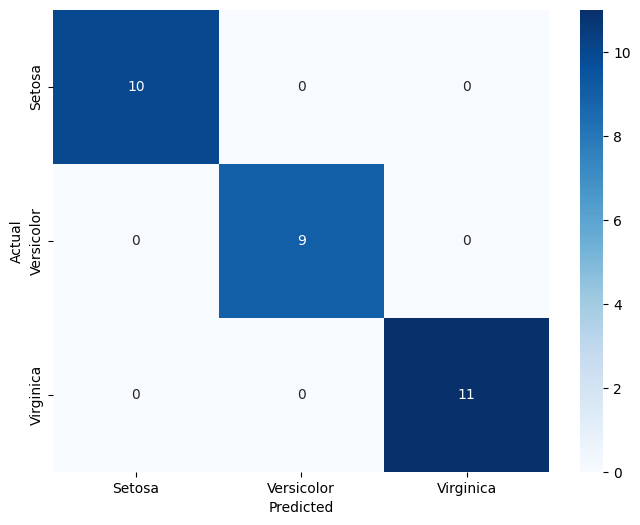

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap (df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()